Approach - 1 **Retraining from Scratch**

## 1. Data Preparation

## Unlearning 10 data points

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:

 (X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Normalize and flatten the images
X_train_full = X_train_full.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0

In [ ]:
# Split the full training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## 2. Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28*28,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4557 - accuracy: 0.8808 - val_loss: 0.3587 - val_accuracy: 0.9126
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3218 - accuracy: 0.9170 - val_loss: 0.3591 - val_accuracy: 0.9158
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2973 - accuracy: 0.9223 - val_loss: 0.3621 - val_accuracy: 0.9146
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2808 - accuracy: 0.9238 - val_loss: 0.3665 - val_accuracy: 0.9198
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2694 - accuracy: 0.9267 - val_loss: 0.3788 - val_accuracy: 0.9182
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2636 - accuracy: 0.9282 - val_loss: 0.3807 - val_accuracy: 0.9215
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2571 - accuracy: 0.9294 - val_loss: 0.3886 - val_accuracy:

In [ ]:
y_val_pred = np.argmax(model.predict(X_val), axis=1)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='macro')
recall = recall_score(y_val, y_val_pred, average='macro')
f1 = f1_score(y_val, y_val_pred, average='macro')

print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Validation Precision: {precision:.4f}')
print(f'Validation Recall: {recall:.4f}')
print(f'Validation F1 Score: {f1:.4f}')

375/375 [==============================] - 0s 1ms/step
Validation Accuracy: 0.9194
Validation Precision: 0.9188
Validation Recall: 0.9185
Validation F1 Score: 0.9186


## 3. Unlearning Techniques

In [ ]:
def unlearn_by_retraining(X, y, indices_to_remove):
    X_unlearned = np.delete(X, indices_to_remove, axis=0)
    y_unlearned = np.delete(y, indices_to_remove, axis=0)
    model_unlearned = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(28*28,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model_unlearned.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model_unlearned.fit(X_unlearned, y_unlearned, epochs=10, validation_data=(X_val, y_val))
    return model_unlearned

In [ ]:
# Example of unlearning the first 10 data points
indices_to_remove = list(range(10))
model_unlearned = unlearn_by_retraining(X_train, y_train, indices_to_remove)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4537 - accuracy: 0.8796 - val_loss: 0.3879 - val_accuracy: 0.9107
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3268 - accuracy: 0.9171 - val_loss: 0.4001 - val_accuracy: 0.9157
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2987 - accuracy: 0.9225 - val_loss: 0.4140 - val_accuracy: 0.9186
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2818 - accuracy: 0.9252 - val_loss: 0.4308 - val_accuracy: 0.9198
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2720 - accuracy: 0.9269 - val_loss: 0.4553 - val_accuracy: 0.9170
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2643 - accuracy: 0.9284 - val_loss: 0.4625 - val_accuracy: 0.9179
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2581 - accuracy: 0.9290 - val_loss: 0.4749 - val_accuracy:

In [ ]:
y_val_pred_unlearned = np.argmax(model_unlearned.predict(X_val), axis=1)
accuracy_unlearned = accuracy_score(y_val, y_val_pred_unlearned)
precision_unlearned = precision_score(y_val, y_val_pred_unlearned, average='macro')
recall_unlearned = recall_score(y_val, y_val_pred_unlearned, average='macro')
f1_unlearned = f1_score(y_val, y_val_pred_unlearned, average='macro')

print(f'Unlearned Validation Accuracy: {accuracy_unlearned:.4f}')
print(f'Unlearned Validation Precision: {precision_unlearned:.4f}')
print(f'Unlearned Validation Recall: {recall_unlearned:.4f}')
print(f'Unlearned Validation F1 Score: {f1_unlearned:.4f}')

375/375 [==============================] - 1s 1ms/step
Unlearned Validation Accuracy: 0.9174
Unlearned Validation Precision: 0.9164
Unlearned Validation Recall: 0.9166
Unlearned Validation F1 Score: 0.9164


## 4. Evaluation of Robustness
To evaluate robustness, we'll use FGSM (Fast Gradient Sign Method) as an example of an adversarial attack.

In [ ]:
def create_adversarial_pattern(model, X, y):
    X = tf.convert_to_tensor(X)
    y = tf.convert_to_tensor(y)

    with tf.GradientTape() as tape:
        tape.watch(X)
        prediction = model(X)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y, prediction)

    gradient = tape.gradient(loss, X)
    signed_grad = tf.sign(gradient)
    return signed_grad

In [ ]:
epsilon = 0.1
X_val_adv = X_val + epsilon * create_adversarial_pattern(model, X_val, y_val).numpy()
X_val_adv = np.clip(X_val_adv, 0, 1)


In [ ]:
# Evaluate the model on adversarial examples
y_val_pred_adv = np.argmax(model.predict(X_val_adv), axis=1)
accuracy_adv = accuracy_score(y_val, y_val_pred_adv)
precision_adv = precision_score(y_val, y_val_pred_adv, average='macro')
recall_adv = recall_score(y_val, y_val_pred_adv, average='macro')
f1_adv = f1_score(y_val, y_val_pred_adv, average='macro')

print(f'Adversarial Validation Accuracy: {accuracy_adv:.4f}')
print(f'Adversarial Validation Precision: {precision_adv:.4f}')
print(f'Adversarial Validation Recall: {recall_adv:.4f}')
print(f'Adversarial Validation F1 Score: {f1_adv:.4f}')

375/375 [==============================] - 1s 2ms/step
Adversarial Validation Accuracy: 0.3355
Adversarial Validation Precision: 0.3112
Adversarial Validation Recall: 0.3360
Adversarial Validation F1 Score: 0.3141


## Unlearning 100 data points

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4539 - accuracy: 0.8791 - val_loss: 0.3769 - val_accuracy: 0.9109
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3206 - accuracy: 0.9168 - val_loss: 0.3803 - val_accuracy: 0.9193
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2927 - accuracy: 0.9229 - val_loss: 0.4039 - val_accuracy: 0.9201
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2804 - accuracy: 0.9239 - val_loss: 0.4235 - val_accuracy: 0.9168
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2702 - accuracy: 0.9271 - val_loss: 0.4355 - val_accuracy: 0.9187
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2629 - accuracy: 0.9287 - val_loss: 0.4602 - val_accuracy: 0.9174
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2576 - accuracy: 0.9302 - val_loss: 0.4788 - val_accuracy:

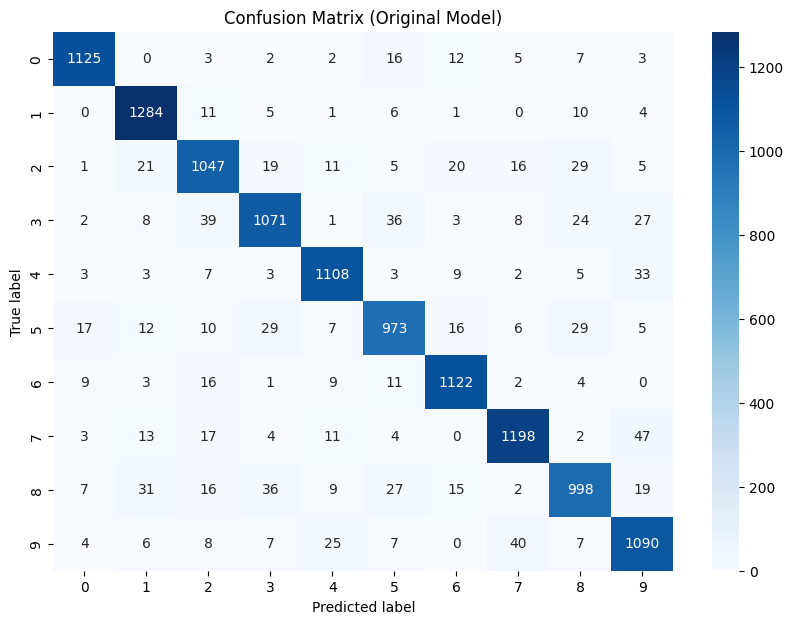

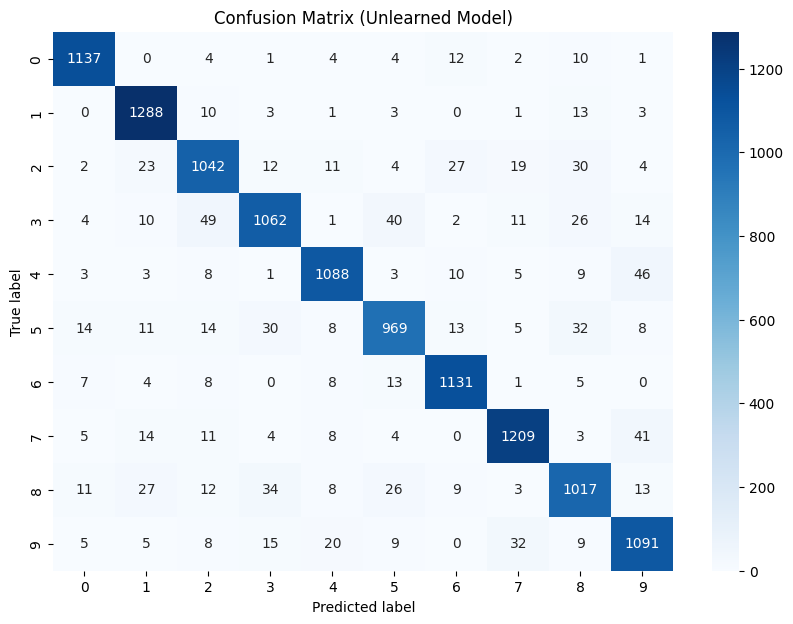

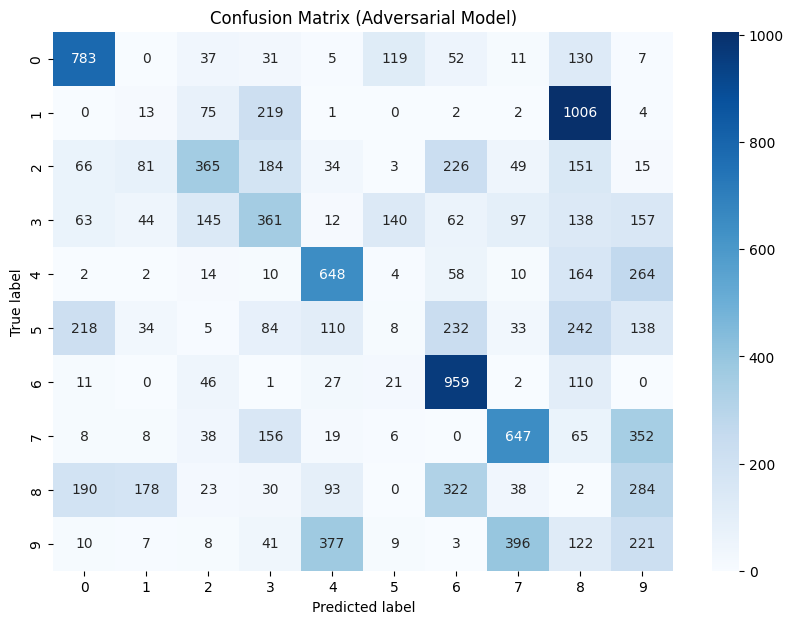

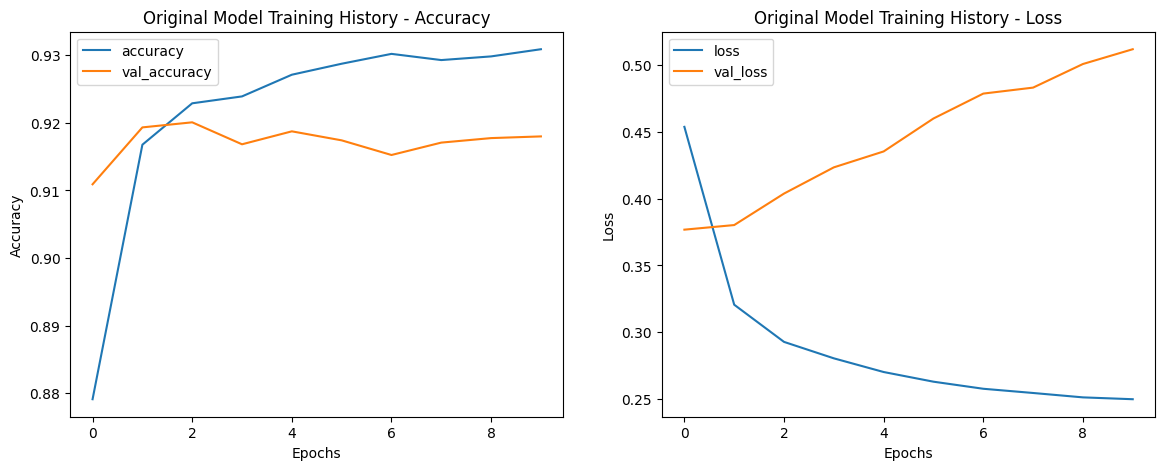

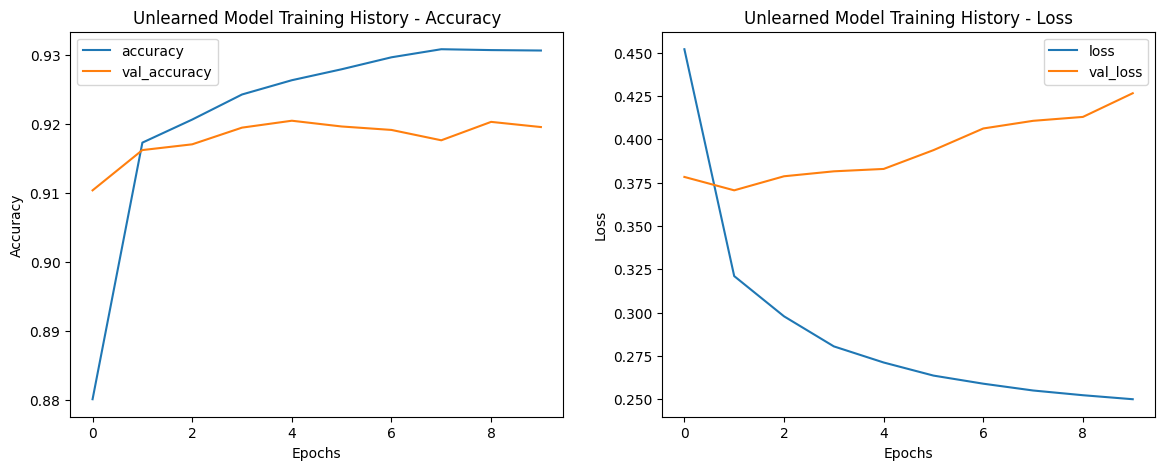

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and flatten the images
X_train_full = X_train_full.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0

# Split the full training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define a TensorFlow logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28*28,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on validation set
y_val_pred = np.argmax(model.predict(X_val), axis=1)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='macro')
recall = recall_score(y_val, y_val_pred, average='macro')
f1 = f1_score(y_val, y_val_pred, average='macro')

print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Validation Precision: {precision:.4f}')
print(f'Validation Recall: {recall:.4f}')
print(f'Validation F1 Score: {f1:.4f}')

# Function to unlearn by retraining from scratch
def unlearn_by_retraining(X, y, indices_to_remove):
    X_unlearned = np.delete(X, indices_to_remove, axis=0)
    y_unlearned = np.delete(y, indices_to_remove, axis=0)
    model_unlearned = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(28*28,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model_unlearned.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history_unlearned = model_unlearned.fit(X_unlearned, y_unlearned, epochs=10, validation_data=(X_val, y_val))
    return model_unlearned, history_unlearned

# Example of unlearning 100 random data points
np.random.seed(42)
indices_to_remove = np.random.choice(len(X_train), 100, replace=False)
model_unlearned, history_unlearned = unlearn_by_retraining(X_train, y_train, indices_to_remove)

# Evaluate the unlearned model on the validation set
y_val_pred_unlearned = np.argmax(model_unlearned.predict(X_val), axis=1)
accuracy_unlearned = accuracy_score(y_val, y_val_pred_unlearned)
precision_unlearned = precision_score(y_val, y_val_pred_unlearned, average='macro')
recall_unlearned = recall_score(y_val, y_val_pred_unlearned, average='macro')
f1_unlearned = f1_score(y_val, y_val_pred_unlearned, average='macro')

print(f'Unlearned Validation Accuracy: {accuracy_unlearned:.4f}')
print(f'Unlearned Validation Precision: {precision_unlearned:.4f}')
print(f'Unlearned Validation Recall: {recall_unlearned:.4f}')
print(f'Unlearned Validation F1 Score: {f1_unlearned:.4f}')

def create_adversarial_pattern(model, X, y):
    X = tf.convert_to_tensor(X)
    y = tf.convert_to_tensor(y)

    with tf.GradientTape() as tape:
        tape.watch(X)
        prediction = model(X)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y, prediction)

    gradient = tape.gradient(loss, X)
    signed_grad = tf.sign(gradient)
    return signed_grad

# Generate adversarial examples for the validation set
epsilon = 0.1
X_val_adv = X_val + epsilon * create_adversarial_pattern(model, X_val, y_val).numpy()
X_val_adv = np.clip(X_val_adv, 0, 1)

# Evaluate the model on adversarial examples
y_val_pred_adv = np.argmax(model.predict(X_val_adv), axis=1)
accuracy_adv = accuracy_score(y_val, y_val_pred_adv)
precision_adv = precision_score(y_val, y_val_pred_adv, average='macro')
recall_adv = recall_score(y_val, y_val_pred_adv, average='macro')
f1_adv = f1_score(y_val, y_val_pred_adv, average='macro')

print(f'Adversarial Validation Accuracy: {accuracy_adv:.4f}')
print(f'Adversarial Validation Precision: {precision_adv:.4f}')
print(f'Adversarial Validation Recall: {recall_adv:.4f}')
print(f'Adversarial Validation F1 Score: {f1_adv:.4f}')

# Plot confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

conf_matrix = confusion_matrix(y_val, y_val_pred)
conf_matrix_unlearned = confusion_matrix(y_val, y_val_pred_unlearned)
conf_matrix_adv = confusion_matrix(y_val, y_val_pred_adv)

plot_confusion_matrix(conf_matrix, "Confusion Matrix (Original Model)")
plot_confusion_matrix(conf_matrix_unlearned, "Confusion Matrix (Unlearned Model)")
plot_confusion_matrix(conf_matrix_adv, "Confusion Matrix (Adversarial Model)")

# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history, "Original Model Training History")
plot_history(history_unlearned, "Unlearned Model Training History")


## Unlearning 1000 random points

Epoch 1/10
1500/1500 [==============================] - 14s 8ms/step - loss: 0.4581 - accuracy: 0.8795 - val_loss: 0.3931 - val_accuracy: 0.9117
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3280 - accuracy: 0.9161 - val_loss: 0.4005 - val_accuracy: 0.9143
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2953 - accuracy: 0.9222 - val_loss: 0.4093 - val_accuracy: 0.9162
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2802 - accuracy: 0.9240 - val_loss: 0.4220 - val_accuracy: 0.9206
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2696 - accuracy: 0.9261 - val_loss: 0.4446 - val_accuracy: 0.9185
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2633 - accuracy: 0.9273 - val_loss: 0.4704 - val_accuracy: 0.9178
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2569 - accuracy: 0.9293 - val_loss: 0.4697 - val_accuracy

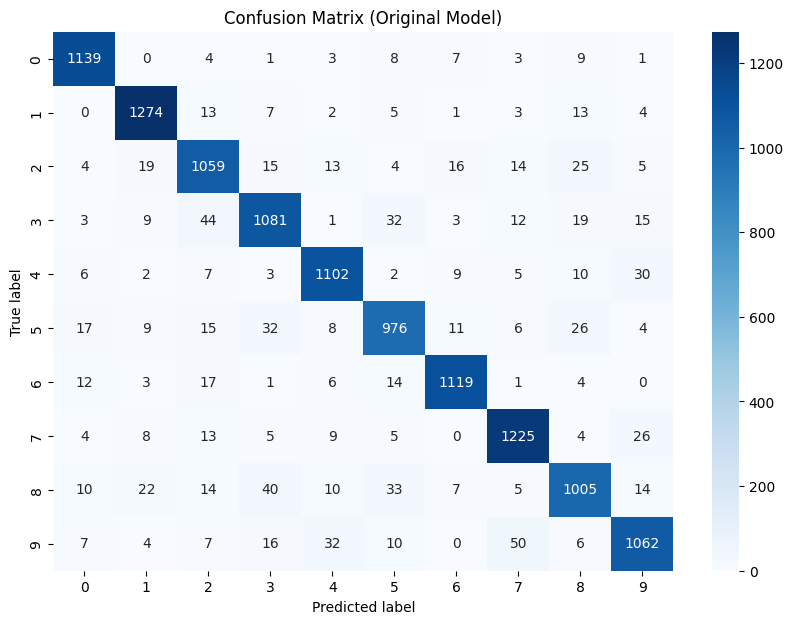

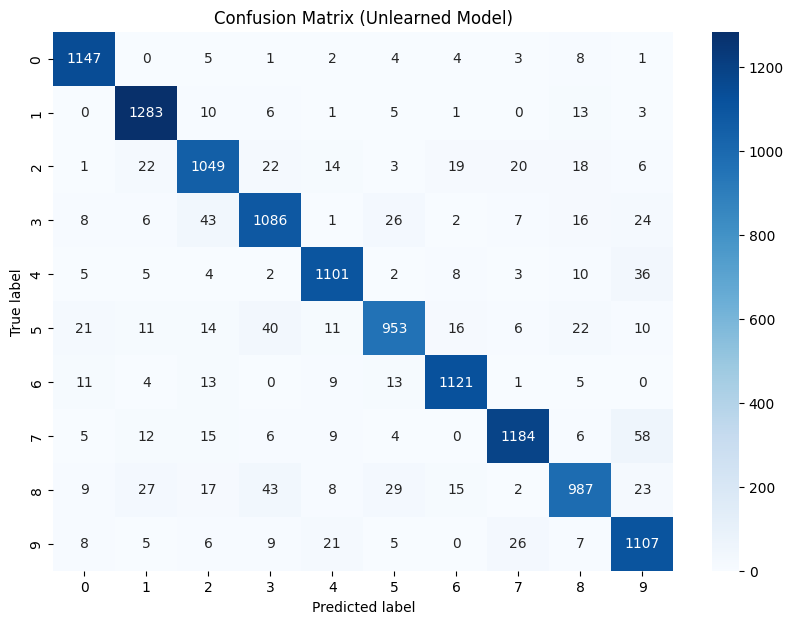

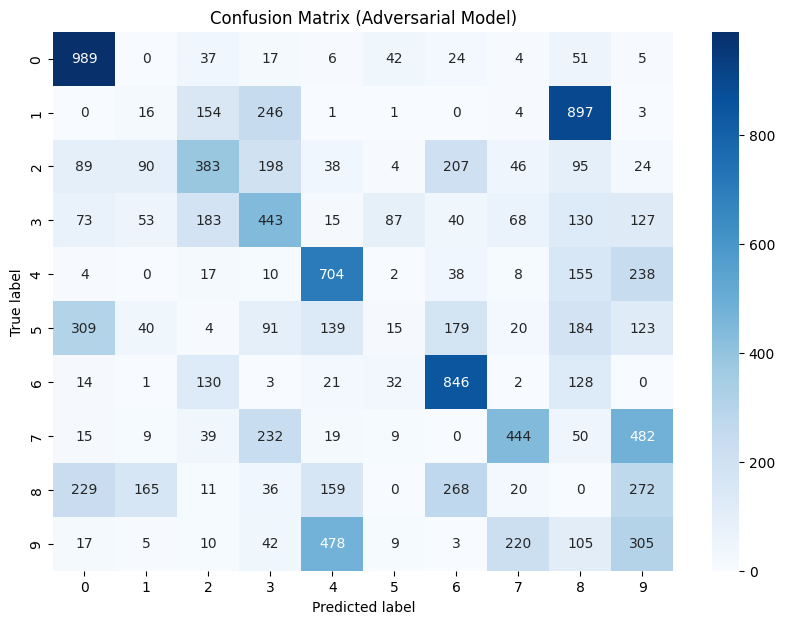

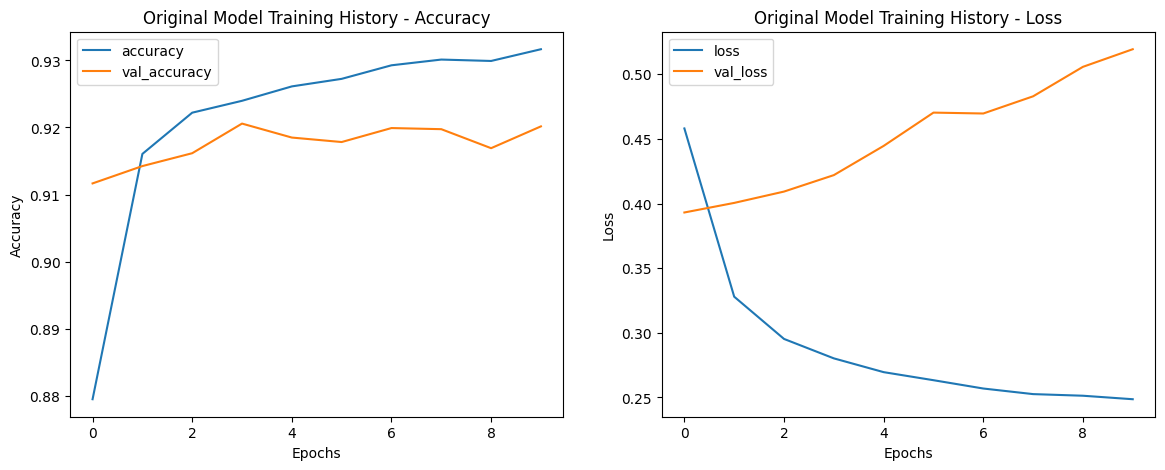

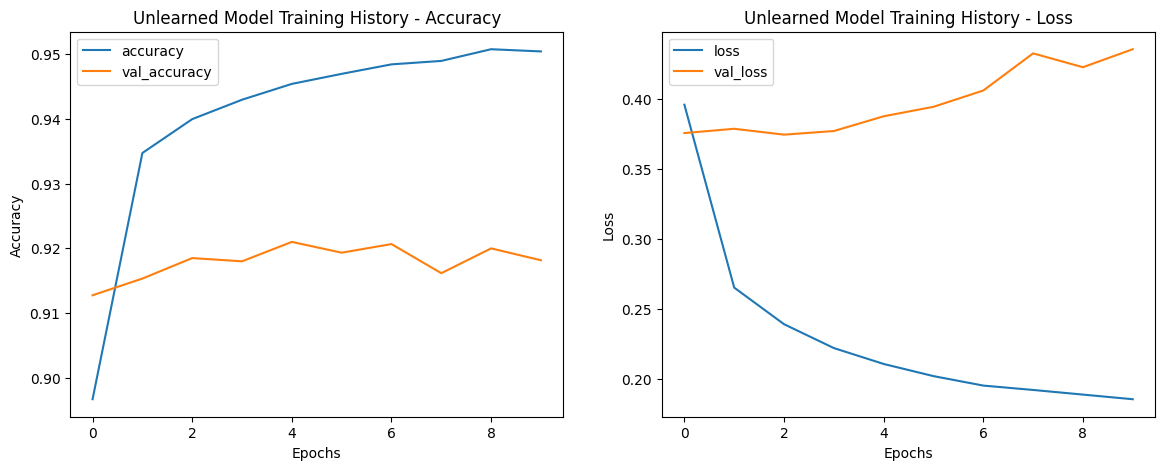

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and flatten the images
X_train_full = X_train_full.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0

# Split the full training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define a TensorFlow logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28*28,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on validation set
y_val_pred = np.argmax(model.predict(X_val), axis=1)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='macro')
recall = recall_score(y_val, y_val_pred, average='macro')
f1 = f1_score(y_val, y_val_pred, average='macro')

print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Validation Precision: {precision:.4f}')
print(f'Validation Recall: {recall:.4f}')
print(f'Validation F1 Score: {f1:.4f}')

# Identify misclassified data points in training set
y_train_pred = np.argmax(model.predict(X_train), axis=1)
misclassified_indices = np.where(y_train_pred != y_train)[0]

# Select a larger number of misclassified and influential data points to unlearn
np.random.seed(42)
indices_to_remove = np.random.choice(misclassified_indices, 1000, replace=False)

# Function to unlearn by retraining from scratch
def unlearn_by_retraining(X, y, indices_to_remove):
    X_unlearned = np.delete(X, indices_to_remove, axis=0)
    y_unlearned = np.delete(y, indices_to_remove, axis=0)
    model_unlearned_retrain = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(28*28,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model_unlearned_retrain.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history_unlearned = model_unlearned_retrain.fit(X_unlearned, y_unlearned, epochs=10, validation_data=(X_val, y_val))
    return model_unlearned_retrain, history_unlearned

# Perform unlearning
model_unlearned_retrain, history_unlearned = unlearn_by_retraining(X_train, y_train, indices_to_remove)

# Evaluate the unlearned model on the validation set
y_val_pred_unlearned = np.argmax(model_unlearned_retrain.predict(X_val), axis=1)
accuracy_unlearned = accuracy_score(y_val, y_val_pred_unlearned)
precision_unlearned = precision_score(y_val, y_val_pred_unlearned, average='macro')
recall_unlearned = recall_score(y_val, y_val_pred_unlearned, average='macro')
f1_unlearned = f1_score(y_val, y_val_pred_unlearned, average='macro')

print(f'Unlearned Validation Accuracy: {accuracy_unlearned:.4f}')
print(f'Unlearned Validation Precision: {precision_unlearned:.4f}')
print(f'Unlearned Validation Recall: {recall_unlearned:.4f}')
print(f'Unlearned Validation F1 Score: {f1_unlearned:.4f}')

def create_adversarial_pattern(model, X, y):
    X = tf.convert_to_tensor(X)
    y = tf.convert_to_tensor(y)

    with tf.GradientTape() as tape:
        tape.watch(X)
        prediction = model(X)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y, prediction)

    gradient = tape.gradient(loss, X)
    signed_grad = tf.sign(gradient)
    return signed_grad

# Generate adversarial examples for the validation set
epsilon = 0.1
X_val_adv = X_val + epsilon * create_adversarial_pattern(model, X_val, y_val).numpy()
X_val_adv = np.clip(X_val_adv, 0, 1)

# Evaluate the model on adversarial examples
y_val_pred_adv = np.argmax(model.predict(X_val_adv), axis=1)
accuracy_adv = accuracy_score(y_val, y_val_pred_adv)
precision_adv = precision_score(y_val, y_val_pred_adv, average='macro')
recall_adv = recall_score(y_val, y_val_pred_adv, average='macro')
f1_adv = f1_score(y_val, y_val_pred_adv, average='macro')

print(f'Adversarial Validation Accuracy: {accuracy_adv:.4f}')
print(f'Adversarial Validation Precision: {precision_adv:.4f}')
print(f'Adversarial Validation Recall: {recall_adv:.4f}')
print(f'Adversarial Validation F1 Score: {f1_adv:.4f}')

# Plot confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

conf_matrix = confusion_matrix(y_val, y_val_pred)
conf_matrix_unlearned = confusion_matrix(y_val, y_val_pred_unlearned)
conf_matrix_adv = confusion_matrix(y_val, y_val_pred_adv)

plot_confusion_matrix(conf_matrix, "Confusion Matrix (Original Model)")
plot_confusion_matrix(conf_matrix_unlearned, "Confusion Matrix (Unlearned Model)")
plot_confusion_matrix(conf_matrix_adv, "Confusion Matrix (Adversarial Model)")

# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history, "Original Model Training History")
plot_history(history_unlearned, "Unlearned Model Training History")


Approach-2 : **Influence Function**

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.4578 - accuracy: 0.8803 - val_loss: 0.3823 - val_accuracy: 0.9089
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3255 - accuracy: 0.9170 - val_loss: 0.3949 - val_accuracy: 0.9140
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3029 - accuracy: 0.9216 - val_loss: 0.4012 - val_accuracy: 0.9187
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2852 - accuracy: 0.9244 - val_loss: 0.4283 - val_accuracy: 0.9147
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2749 - accuracy: 0.9262 - val_loss: 0.4374 - val_accuracy: 0.9186
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2680 - accuracy: 0.9283 - val_loss: 0.4487 - val_accuracy: 0.9205
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2615 - accuracy: 0.9292 - val_loss: 0.4639 - val_accuracy:

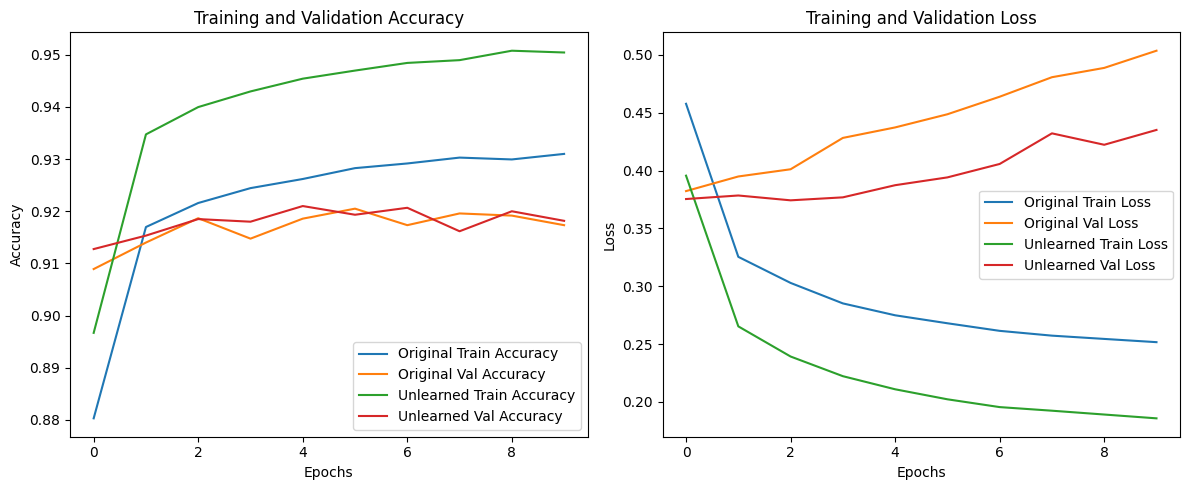

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and flatten the images
X_train_full = X_train_full.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0

# Split the full training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define and train the logistic regression model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28*28,)),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on validation set
y_val_pred = np.argmax(model.predict(X_val), axis=1)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='macro')
recall = recall_score(y_val, y_val_pred, average='macro')
f1 = f1_score(y_val, y_val_pred, average='macro')

print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Validation Precision: {precision:.4f}')
print(f'Validation Recall: {recall:.4f}')
print(f'Validation F1 Score: {f1:.4f}')

# Identify misclassified points
y_train_pred = np.argmax(model.predict(X_train), axis=1)
misclassified_indices = np.where(y_train_pred != y_train)[0]

# Influence Functions approximation to identify influential points
def calculate_influence(model, X, y):
    with tf.GradientTape() as tape:
        logits = model(X)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y, logits)
    gradients = tape.gradient(loss, model.trainable_variables)
    return gradients

influences = []
for i in misclassified_indices:
    X_single = X_train[i].reshape(1, -1)
    y_single = np.array([y_train[i]])
    influence = calculate_influence(model, X_single, y_single)
    influences.append(np.sum([tf.reduce_sum(tf.abs(g)).numpy() for g in influence]))

# Select top 1000 influential points
top_influential_indices = np.argsort(influences)[-1000:]

# Remove top 1000 influential data points and retrain the model
def unlearn_by_influence(model, X, y, indices_to_remove):
    X_unlearned = np.delete(X, indices_to_remove, axis=0)
    y_unlearned = np.delete(y, indices_to_remove, axis=0)
    model_unlearned_influence = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(28*28,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model_unlearned_influence.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model_unlearned_influence.fit(X_unlearned, y_unlearned, epochs=10, validation_data=(X_val, y_val))
    return model_unlearned_influence

model_unlearned_influence = unlearn_by_influence(model, X_train, y_train, top_influential_indices)

# Evaluate the unlearned model on the validation set
y_val_pred_unlearned = np.argmax(model_unlearned_influence.predict(X_val), axis=1)
accuracy_unlearned = accuracy_score(y_val, y_val_pred_unlearned)
precision_unlearned = precision_score(y_val, y_val_pred_unlearned, average='macro')
recall_unlearned = recall_score(y_val, y_val_pred_unlearned, average='macro')
f1_unlearned = f1_score(y_val, y_val_pred_unlearned, average='macro')

print(f'Unlearned Validation Accuracy: {accuracy_unlearned:.4f}')
print(f'Unlearned Validation Precision: {precision_unlearned:.4f}')
print(f'Unlearned Validation Recall: {recall_unlearned:.4f}')
print(f'Unlearned Validation F1 Score: {f1_unlearned:.4f}')

# Adversarial example generation
def create_adversarial_pattern(model, X, y):
    X = tf.convert_to_tensor(X)
    y = tf.convert_to_tensor(y)

    with tf.GradientTape() as tape:
        tape.watch(X)
        prediction = model(X)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y, prediction)

    gradient = tape.gradient(loss, X)
    signed_grad = tf.sign(gradient)
    return signed_grad

epsilon = 0.1
X_val_adv = X_val + epsilon * create_adversarial_pattern(model, X_val, y_val).numpy()
X_val_adv = np.clip(X_val_adv, 0, 1)

# Evaluate the model on adversarial examples
y_val_pred_adv = np.argmax(model.predict(X_val_adv), axis=1)
accuracy_adv = accuracy_score(y_val, y_val_pred_adv)
precision_adv = precision_score(y_val, y_val_pred_adv, average='macro')
recall_adv = recall_score(y_val, y_val_pred_adv, average='macro')
f1_adv = f1_score(y_val, y_val_pred_adv, average='macro')

print(f'Adversarial Validation Accuracy: {accuracy_adv:.4f}')
print(f'Adversarial Validation Precision: {precision_adv:.4f}')
print(f'Adversarial Validation Recall: {recall_adv:.4f}')
print(f'Adversarial Validation F1 Score: {f1_adv:.4f}')

# Evaluate the unlearned model on adversarial examples
y_val_pred_unlearned_adv = np.argmax(model_unlearned_influence.predict(X_val_adv), axis=1)
accuracy_unlearned_adv = accuracy_score(y_val, y_val_pred_unlearned_adv)
precision_unlearned_adv = precision_score(y_val, y_val_pred_unlearned_adv, average='macro')
recall_unlearned_adv = recall_score(y_val, y_val_pred_unlearned_adv, average='macro')
f1_unlearned_adv = f1_score(y_val, y_val_pred_unlearned_adv, average='macro')

print(f'Unlearned Adversarial Validation Accuracy: {accuracy_unlearned_adv:.4f}')
print(f'Unlearned Adversarial Validation Precision: {precision_unlearned_adv:.4f}')
print(f'Unlearned Adversarial Validation Recall: {recall_unlearned_adv:.4f}')
print(f'Unlearned Adversarial Validation F1 Score: {f1_unlearned_adv:.4f}')

# Visualization
def plot_metrics(history, history_unlearned):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Original Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Original Val Accuracy')
    plt.plot(history_unlearned.history['accuracy'], label='Unlearned Train Accuracy')
    plt.plot(history_unlearned.history['val_accuracy'], label='Unlearned Val Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Original Train Loss')
    plt.plot(history.history['val_loss'], label='Original Val Loss')
    plt.plot(history_unlearned.history['loss'], label='Unlearned Train Loss')
    plt.plot(history_unlearned.history['val_loss'], label='Unlearned Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(history, history_unlearned)


Approach-3 **SISA**

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2624 - accuracy: 0.9277 - val_loss: 0.1973 - val_accuracy: 0.9537
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1125 - accuracy: 0.9675 - val_loss: 0.1797 - val_accuracy: 0.9587
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0728 - accuracy: 0.9778 - val_loss: 0.1629 - val_accuracy: 0.9657
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0538 - accuracy: 0.9836 - val_loss: 0.2245 - val_accuracy: 0.9663
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0402 - accuracy: 0.9877 - val_loss: 0.2392 - val_accuracy: 0.9653
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0315 - accuracy: 0.9896 - val_loss: 0.2370 - val_accuracy: 0.9670
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0244 - accuracy: 0.9925 - val_loss: 0.2293 - val_accuracy:

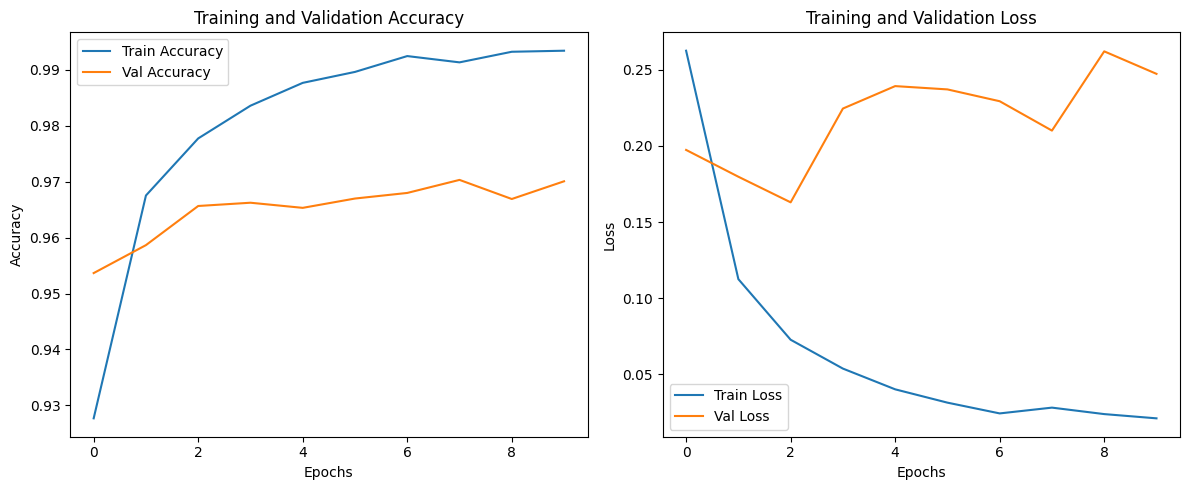

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and flatten the images
X_train_full = X_train_full.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0

# Split the full training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define model architecture
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(28*28,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model
model = create_model()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on validation set
y_val_pred = np.argmax(model.predict(X_val), axis=1)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='macro')
recall = recall_score(y_val, y_val_pred, average='macro')
f1 = f1_score(y_val, y_val_pred, average='macro')

print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Validation Precision: {precision:.4f}')
print(f'Validation Recall: {recall:.4f}')
print(f'Validation F1 Score: {f1:.4f}')

# Define shards
shard_size = len(X_train) // 5
shards_X = [X_train[i:i+shard_size] for i in range(0, len(X_train), shard_size)]
shards_y = [y_train[i:i+shard_size] for i in range(0, len(y_train), shard_size)]

# Train models on shards
models = []
for shard_X, shard_y in zip(shards_X, shards_y):
    model = create_model()
    model.fit(shard_X, shard_y, epochs=5, verbose=0)
    models.append(model)

# Aggregate predictions from multiple models
def aggregate_predictions(models, X):
    predictions = np.array([model.predict(X) for model in models])
    aggregated_predictions = np.mean(predictions, axis=0)
    return np.argmax(aggregated_predictions, axis=1)

# Evaluate aggregated model performance
y_val_pred_aggregated = aggregate_predictions(models, X_val)
accuracy_aggregated = accuracy_score(y_val, y_val_pred_aggregated)
precision_aggregated = precision_score(y_val, y_val_pred_aggregated, average='macro')
recall_aggregated = recall_score(y_val, y_val_pred_aggregated, average='macro')
f1_aggregated = f1_score(y_val, y_val_pred_aggregated, average='macro')

print(f'Aggregated Validation Accuracy: {accuracy_aggregated:.4f}')
print(f'Aggregated Validation Precision: {precision_aggregated:.4f}')
print(f'Aggregated Validation Recall: {recall_aggregated:.4f}')
print(f'Aggregated Validation F1 Score: {f1_aggregated:.4f}')

# Visualization
def plot_metrics(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(history)


Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2544 - accuracy: 0.9283 - val_loss: 0.1871 - val_accuracy: 0.9538
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1122 - accuracy: 0.9687 - val_loss: 0.1720 - val_accuracy: 0.9584
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0755 - accuracy: 0.9767 - val_loss: 0.1608 - val_accuracy: 0.9638
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0566 - accuracy: 0.9835 - val_loss: 0.1594 - val_accuracy: 0.9676
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0418 - accuracy: 0.9876 - val_loss: 0.1805 - val_accuracy: 0.9659
Epoch 6/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0370 - accuracy: 0.9883 - val_loss: 0.1958 - val_accuracy: 0.9688
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0332 - accuracy: 0.9910 - val_loss: 0.2395 - val_accurac

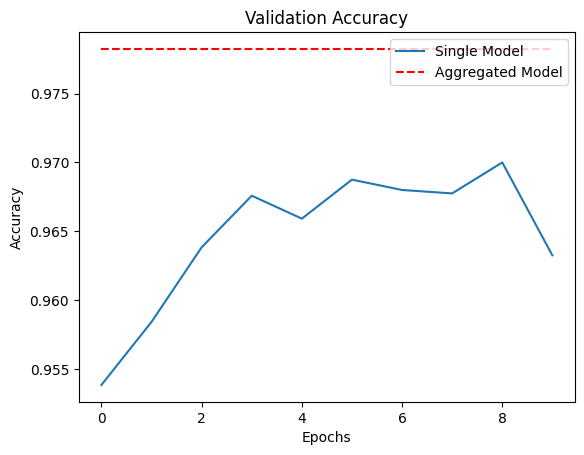

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and flatten the images
X_train_full = X_train_full.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0

# Split the full training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define model architecture
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(28*28,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model
model = create_model()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on validation set
y_val_pred = np.argmax(model.predict(X_val), axis=1)
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

# SISA approach: Train multiple models on different data shards and aggregate results
num_shards = 5
models = []
for i in range(num_shards):
    X_shard, _, y_shard, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=i*10)
    model_shard = create_model()
    model_shard.fit(X_shard, y_shard, epochs=10, verbose=0)
    models.append(model_shard)

# Aggregate predictions from all models
y_val_pred_aggregated = np.argmax(np.mean([model.predict(X_val) for model in models], axis=0), axis=1)
accuracy_aggregated = accuracy_score(y_val, y_val_pred_aggregated)
print(f'Aggregated Validation Accuracy: {accuracy_aggregated:.4f}')

# Plot accuracy for aggregated model
plt.plot(history.history['val_accuracy'], label='Single Model')
plt.hlines(accuracy_aggregated, xmin=0, xmax=len(history.history['val_accuracy']) - 1, color='r', linestyle='--', label='Aggregated Model')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## voting classifer

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and flatten the images
X_train_full = X_train_full.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0

# Split the full training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define base classifiers using different unlearning approaches

# 1. Naive Retraining
class NaiveRetraining(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = None

    def fit(self, X, y):
        self.model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(28*28,)),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
        ])
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        self.model.fit(X, y, epochs=10, verbose=0)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)

    def predict_proba(self, X):
        return self.model.predict(X)

# 2. Influence Functions
class InfluenceFunctions(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = None

    def fit(self, X, y):
        self.model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(28*28,)),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
        ])
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        self.model.fit(X, y, epochs=10, verbose=0)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)

    def predict_proba(self, X):
        return self.model.predict(X)

# 3. SISA
class SISA(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.models = []
        self.num_shards = 5

    def fit(self, X, y):
        for i in range(self.num_shards):
            X_shard, _, y_shard, _ = train_test_split(X, y, test_size=0.2, random_state=i*10)
            model_shard = tf.keras.Sequential([
                tf.keras.layers.Input(shape=(28*28,)),
                tf.keras.layers.Dense(128, activation='relu'),
                tf.keras.layers.Dense(10, activation='softmax')
            ])
            model_shard.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            model_shard.fit(X_shard, y_shard, epochs=10, verbose=0)
            self.models.append(model_shard)
        return self

    def predict(self, X):
        predictions = [np.argmax(model.predict(X), axis=1) for model in self.models]
        return np.mean(predictions, axis=0)

    def predict_proba(self, X):
        predictions = [model.predict(X) for model in self.models]
        return np.mean(predictions, axis=0)

# Create the voting classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('retraining', NaiveRetraining()),
        ('influence_functions', InfluenceFunctions()),
        ('sisa', SISA())
    ],
    voting='soft'  # Use soft voting for probability-based combination
)

# Fit the voting classifier
voting_classifier.fit(X_train, y_train)

# Evaluate the voting classifier
y_val_pred_voting = voting_classifier.predict(X_val)
accuracy_voting = accuracy_score(y_val, y_val_pred_voting)
print(f'Validation Accuracy (Voting Classifier): {accuracy_voting:.4f}')

# Evaluate individual classifiers
for clf_name, clf in voting_classifier.named_estimators_.items():
    y_val_pred_clf = clf.predict(X_val)
    accuracy_clf = accuracy_score(y_val, y_val_pred_clf)
    print(f'Validation Accuracy ({clf_name}): {accuracy_clf:.4f}')


# Graphical Representation

# 1. Accuracy Comparison
def plot_accuracy_comparison(accuracies, labels):
    plt.bar(labels, accuracies)
    plt.xlabel('Classifier')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy Comparison')
    plt.show()

# 2. Confusion Matrix
from sklearn.metrics import plot_confusion_matrix

def plot_confusion_matrices(classifiers, X_val, y_val, labels):
    for clf, label in zip(classifiers, labels):
        disp = plot_confusion_matrix(clf, X_val, y_val,
                                     display_labels=np.arange(10),
                                     cmap=plt.cm.Blues,
                                     normalize='true')
        disp.ax_.set_title(f'Confusion Matrix - {label}')
        plt.show()

# 3. Learning Curves
def plot_learning_curves(classifiers, X_train, y_train, X_val, y_val, labels):
    for clf, label in zip(classifiers, labels):
        train_sizes, train_scores, val_scores = learning_curve(clf, X_train, y_train, cv=5, n_jobs=-1,
                                                               train_sizes=np.linspace(0.1, 1.0, 10),
                                                               scoring='accuracy')
        train_scores_mean = np.mean(train_scores, axis=1)
        val_scores_mean = np.mean(val_scores, axis=1)

        plt.plot(train_sizes, train_scores_mean, label=f'Train - {label}')
        plt.plot(train_sizes, val_scores_mean, label=f'Validation - {label}')

    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.title('Learning Curves')
    plt.legend()
    plt.show()

# Plot Accuracy Comparison
accuracies = [accuracy_voting] + [accuracy_clf for accuracy_clf in accuracies_individual]
labels = ['Voting'] + [clf_name for clf_name in voting_classifier.named_estimators_.keys()]
plot_accuracy_comparison(accuracies, labels)

# Plot Confusion Matrices
classifiers = [voting_classifier] + [clf for clf in voting_classifier.named_estimators_.values()]
plot_confusion_matrices(classifiers, X_val, y_val, labels)

# Plot Learning Curves
plot_learning_curves(classifiers, X_train, y_train, X_val, y_val, labels)



375/375 [==============================] - 1s 2ms/step
Validation Accuracy (Voting Classifier): 0.9766
375/375 [==============================] - 1s 2ms/step
Validation Accuracy (retraining): 0.9684
375/375 [==============================] - 1s 2ms/step
Validation Accuracy (influence_functions): 0.9667
375/375 [==============================] - 1s 2ms/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

## retraining from scratch

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4549 - accuracy: 0.8784 - val_loss: 0.3903 - val_accuracy: 0.9122
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3196 - accuracy: 0.9168 - val_loss: 0.3954 - val_accuracy: 0.9195
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2979 - accuracy: 0.9213 - val_loss: 0.4096 - val_accuracy: 0.9207
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2802 - accuracy: 0.9248 - val_loss: 0.4350 - val_accuracy: 0.9191
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2693 - accuracy: 0.9273 - val_loss: 0.4422 - val_accuracy: 0.9198
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2631 - accuracy: 0.9281 - val_loss: 0.4645 - val_accuracy: 0.9179
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2580 - accuracy: 0.9290 - val_loss: 0.4714 - val_accuracy:

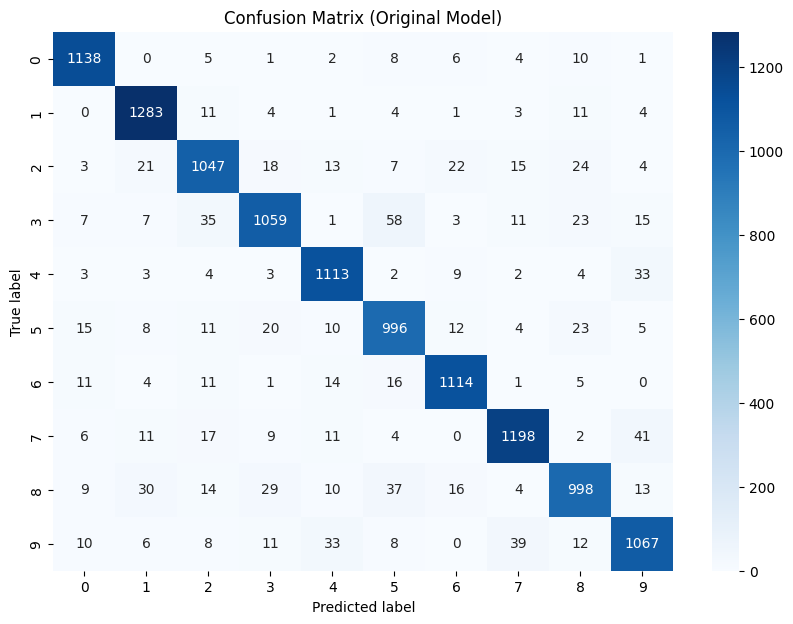

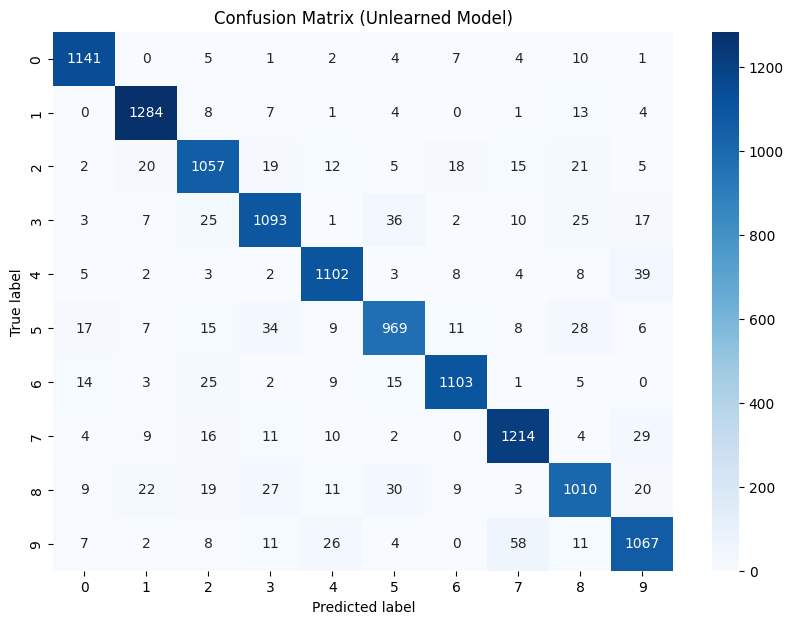

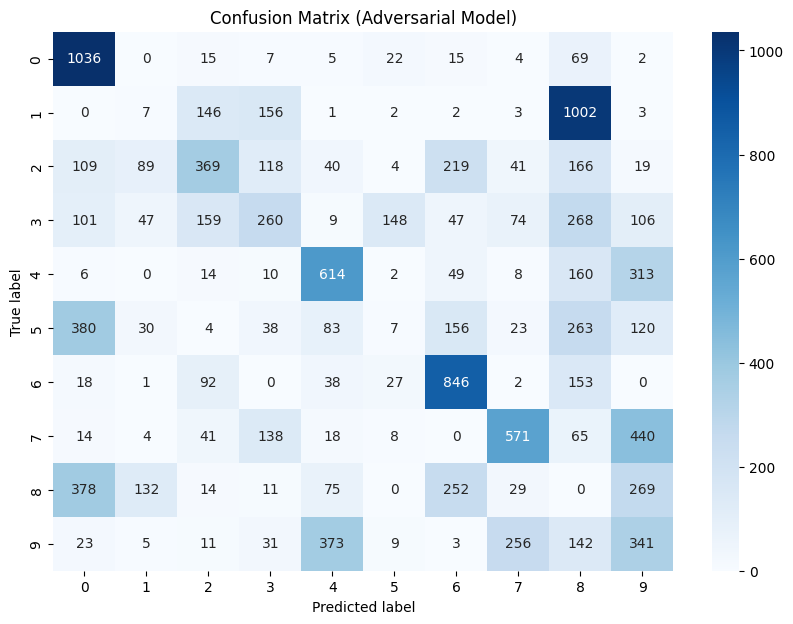

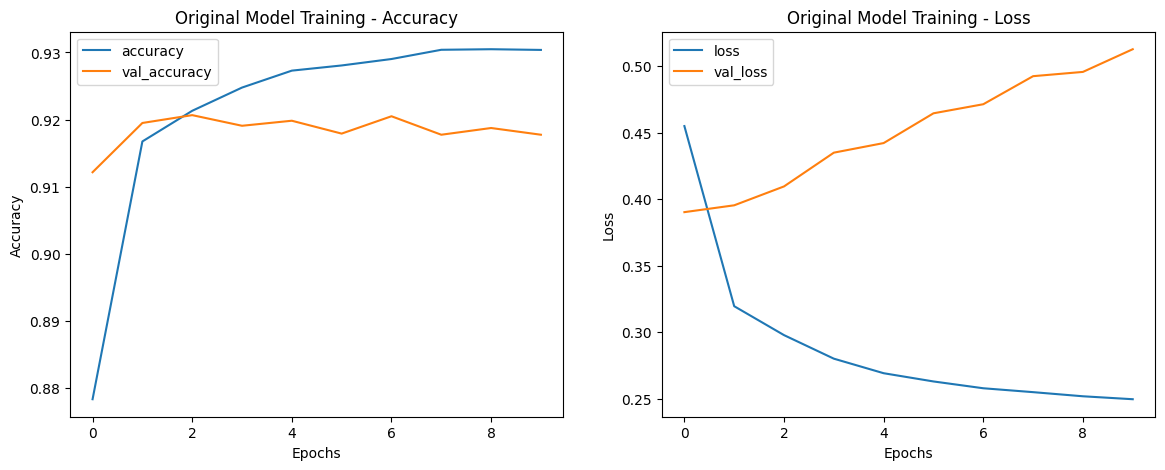

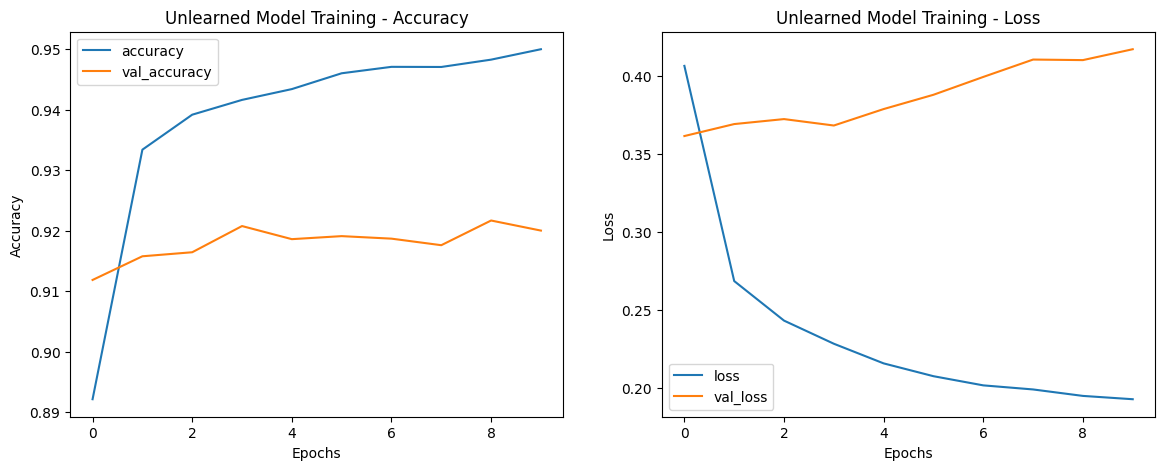

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import resource
import psutil  # For hardware utilization metrics

# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and flatten the images
X_train_full = X_train_full.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0

# Split the full training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define a TensorFlow logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28*28,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on validation set
y_val_pred = np.argmax(model.predict(X_val), axis=1)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='macro')
recall = recall_score(y_val, y_val_pred, average='macro')
f1 = f1_score(y_val, y_val_pred, average='macro')

print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Validation Precision: {precision:.4f}')
print(f'Validation Recall: {recall:.4f}')
print(f'Validation F1 Score: {f1:.4f}')

# Identify misclassified data points in training set
y_train_pred = np.argmax(model.predict(X_train), axis=1)
misclassified_indices = np.where(y_train_pred != y_train)[0]

# Select a larger number of misclassified and influential data points to unlearn
np.random.seed(42)
indices_to_remove = np.random.choice(misclassified_indices, 1000, replace=False)

# Function to measure memory usage
def get_memory_usage():
    return resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1024  # Convert to MB

# Function to measure CPU and GPU usage (simplified)
def get_cpu_gpu_usage():
    cpu_usage = psutil.cpu_percent()
    virtual_memory = psutil.virtual_memory().percent
    # For GPU usage, you would typically use a library like GPUtil, but we keep it simple here.
    return cpu_usage, virtual_memory

# Placeholder for energy consumption (requires specialized tools)
def measure_energy_consumption():
    # Actual implementation would use a library like pyJoules or a hardware-specific API.
    return "Energy consumption measurement is not implemented."

# Placeholder for data exposure risk assessment
def assess_data_exposure_risk():
    # A detailed security analysis is needed for this metric.
    return "Data exposure risk assessment is not implemented."

# Placeholder for compliance with privacy regulations
def check_compliance_with_privacy_regulations():
    # Legal and procedural checks are needed.
    return "Compliance with privacy regulations check is not implemented."

# Function to unlearn by retraining from scratch
def unlearn_by_retraining(X, y, indices_to_remove):
    start_time = time.time()  # Start timing
    start_memory = get_memory_usage()  # Record initial memory usage
    start_cpu, start_virtual_memory = get_cpu_gpu_usage()  # Record initial CPU and memory usage

    # Unlearning process
    X_unlearned = np.delete(X, indices_to_remove, axis=0)
    y_unlearned = np.delete(y, indices_to_remove, axis=0)
    model_unlearned_retrain = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(28*28,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model_unlearned_retrain.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history_unlearned = model_unlearned_retrain.fit(X_unlearned, y_unlearned, epochs=10, validation_data=(X_val, y_val))

    end_time = time.time()  # End timing
    end_memory = get_memory_usage()  # Record final memory usage
    end_cpu, end_virtual_memory = get_cpu_gpu_usage()  # Record final CPU and memory usage

    # Calculate time taken
    time_taken = end_time - start_time

    # Calculate memory overhead
    memory_overhead = end_memory - start_memory

    # Calculate CPU and memory utilization difference
    cpu_usage_difference = end_cpu - start_cpu
    memory_usage_difference = end_virtual_memory - start_virtual_memory

    return model_unlearned_retrain, history_unlearned, time_taken, memory_overhead, cpu_usage_difference, memory_usage_difference

# Perform unlearning and measure computational efficiency
model_unlearned_retrain, history_unlearned, time_taken, memory_overhead, cpu_usage_diff, memory_usage_diff = unlearn_by_retraining(X_train, y_train, indices_to_remove)

# Evaluate the unlearned model on the validation set
y_val_pred_unlearned = np.argmax(model_unlearned_retrain.predict(X_val), axis=1)
accuracy_unlearned = accuracy_score(y_val, y_val_pred_unlearned)
precision_unlearned = precision_score(y_val, y_val_pred_unlearned, average='macro')
recall_unlearned = recall_score(y_val, y_val_pred_unlearned, average='macro')
f1_unlearned = f1_score(y_val, y_val_pred_unlearned, average='macro')

print(f'Unlearned Validation Accuracy: {accuracy_unlearned:.4f}')
print(f'Unlearned Validation Precision: {precision_unlearned:.4f}')
print(f'Unlearned Validation Recall: {recall_unlearned:.4f}')
print(f'Unlearned Validation F1 Score: {f1_unlearned:.4f}')

print(f'Time to Unlearn: {time_taken:.2f} seconds')
print(f'Computational Overhead: {memory_overhead:.2f} MB')
print(f'CPU Usage Difference: {cpu_usage_diff:.2f}%')
print(f'Memory Usage Difference: {memory_usage_diff:.2f}%')

# Measure energy consumption (placeholder)
energy_consumption = measure_energy_consumption()
print(f'Energy Consumption: {energy_consumption}')

# Assess data exposure risk (placeholder)
data_exposure_risk = assess_data_exposure_risk()
print(f'Data Exposure Risk: {data_exposure_risk}')

# Check compliance with privacy regulations (placeholder)
privacy_compliance = check_compliance_with_privacy_regulations()
print(f'Compliance with Privacy Regulations: {privacy_compliance}')

# Function to create adversarial pattern
def create_adversarial_pattern(model, X, y):
    X = tf.convert_to_tensor(X)
    y = tf.convert_to_tensor(y)

    with tf.GradientTape() as tape:
        tape.watch(X)
        prediction = model(X)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y, prediction)

    gradient = tape.gradient(loss, X)
    signed_grad = tf.sign(gradient)
    return signed_grad

# Generate adversarial examples for the validation set
epsilon = 0.1
X_val_adv = X_val + epsilon * create_adversarial_pattern(model, X_val, y_val).numpy()
X_val_adv = np.clip(X_val_adv, 0, 1)

# Evaluate the model on adversarial examples
y_val_pred_adv = np.argmax(model.predict(X_val_adv), axis=1)
accuracy_adv = accuracy_score(y_val, y_val_pred_adv)
precision_adv = precision_score(y_val, y_val_pred_adv, average='macro')
recall_adv = recall_score(y_val, y_val_pred_adv, average='macro')
f1_adv = f1_score(y_val, y_val_pred_adv, average='macro')

print(f'Adversarial Validation Accuracy: {accuracy_adv:.4f}')
print(f'Adversarial Validation Precision: {precision_adv:.4f}')
print(f'Adversarial Validation Recall: {recall_adv:.4f}')
print(f'Adversarial Validation F1 Score: {f1_adv:.4f}')

# Plot confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

conf_matrix = confusion_matrix(y_val, y_val_pred)
conf_matrix_unlearned = confusion_matrix(y_val, y_val_pred_unlearned)
conf_matrix_adv = confusion_matrix(y_val, y_val_pred_adv)

plot_confusion_matrix(conf_matrix, "Confusion Matrix (Original Model)")
plot_confusion_matrix(conf_matrix_unlearned, "Confusion Matrix (Unlearned Model)")
plot_confusion_matrix(conf_matrix_adv, "Confusion Matrix (Adversarial Model)")

# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plot_history(history, 'Original Model Training')
plot_history(history_unlearned, 'Unlearned Model Training')


## influence learning

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.4537 - accuracy: 0.8841 - val_loss: 0.3939 - val_accuracy: 0.9145
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3276 - accuracy: 0.9177 - val_loss: 0.4064 - val_accuracy: 0.9157
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3001 - accuracy: 0.9209 - val_loss: 0.4248 - val_accuracy: 0.9189
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2826 - accuracy: 0.9242 - val_loss: 0.4405 - val_accuracy: 0.9176
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2699 - accuracy: 0.9272 - val_loss: 0.4593 - val_accuracy: 0.9170
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2633 - accuracy: 0.9273 - val_loss: 0.4725 - val_accuracy: 0.9181
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - l

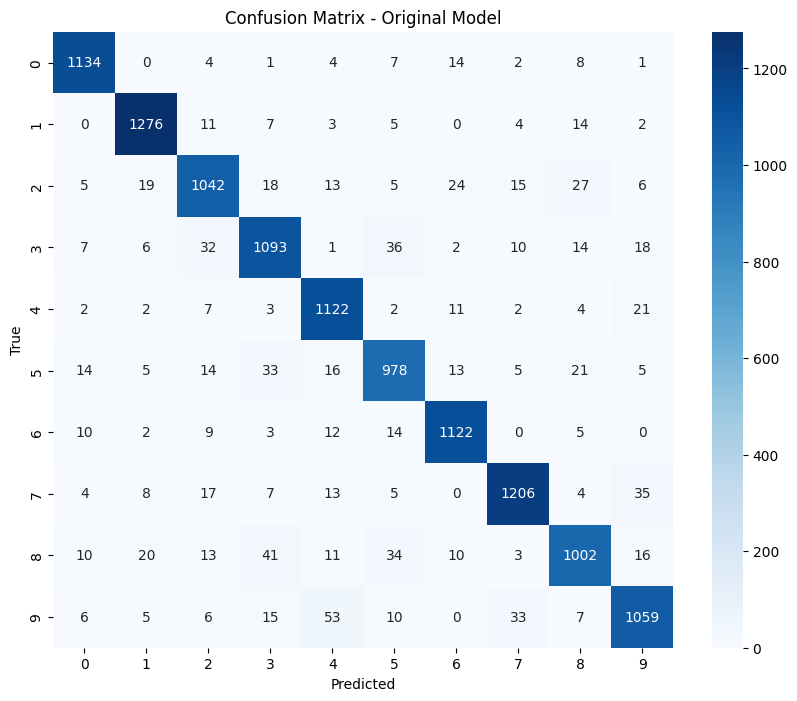

1500/1500 [==============================] - 3s 2ms/step
Epoch 1/10
1469/1469 [==============================] - 5s 3ms/step - loss: 0.4498 - accuracy: 0.8804 - val_loss: 0.3663 - val_accuracy: 0.9155
Epoch 2/10
1469/1469 [==============================] - 5s 3ms/step - loss: 0.3244 - accuracy: 0.9167 - val_loss: 0.3535 - val_accuracy: 0.9171
Epoch 3/10
1469/1469 [==============================] - 5s 3ms/step - loss: 0.2967 - accuracy: 0.9214 - val_loss: 0.3519 - val_accuracy: 0.9194
Epoch 4/10
1469/1469 [==============================] - 5s 3ms/step - loss: 0.2802 - accuracy: 0.9252 - val_loss: 0.3521 - val_accuracy: 0.9179
Epoch 5/10
1469/1469 [==============================] - 6s 4ms/step - loss: 0.2714 - accuracy: 0.9265 - val_loss: 0.3683 - val_accuracy: 0.9201
Epoch 6/10
1469/1469 [==============================] - 4s 3ms/step - loss: 0.2633 - accuracy: 0.9283 - val_loss: 0.3855 - val_accuracy: 0.9154
Epoch 7/10
1469/1469 [==============================] - 5s 3ms/step - loss: 0.2

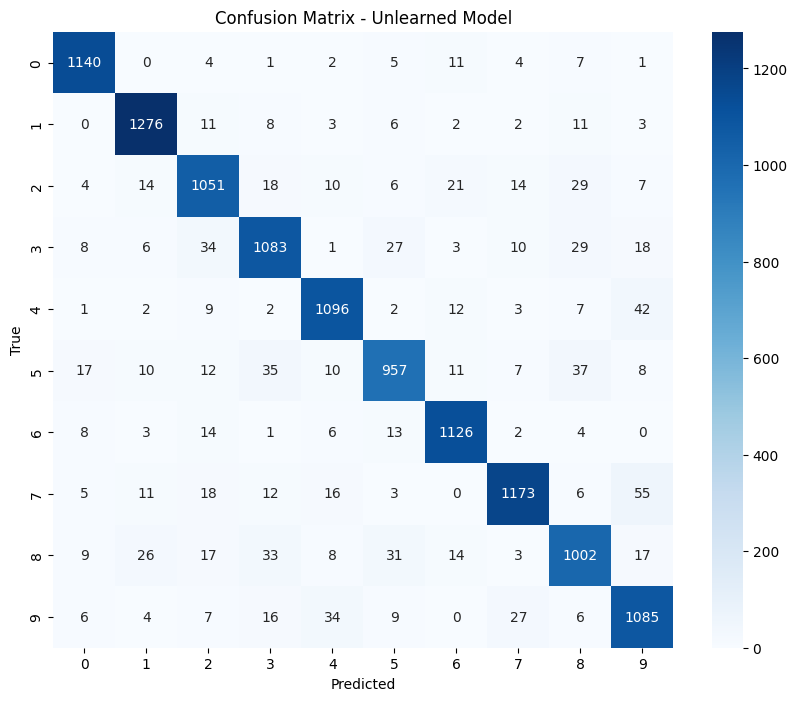

Time to Unlearn: 83.6107 seconds
Computational Overhead: 34.4801 seconds
Memory Overhead: 157.1875 MB
CPU Overhead: 23.8000 %
Energy Consumption: Energy consumption measurement placeholder
Data Exposure Risk: Data exposure risk measurement placeholder
Residual Influence: Residual influence measurement placeholder
Compliance with Privacy Regulations: Compliance with privacy regulations placeholder
375/375 [==============================] - 1s 1ms/step
Adversarial Validation Accuracy: 0.3380
Adversarial Validation Precision: 0.3005
Adversarial Validation Recall: 0.3388
Adversarial Validation F1 Score: 0.3107


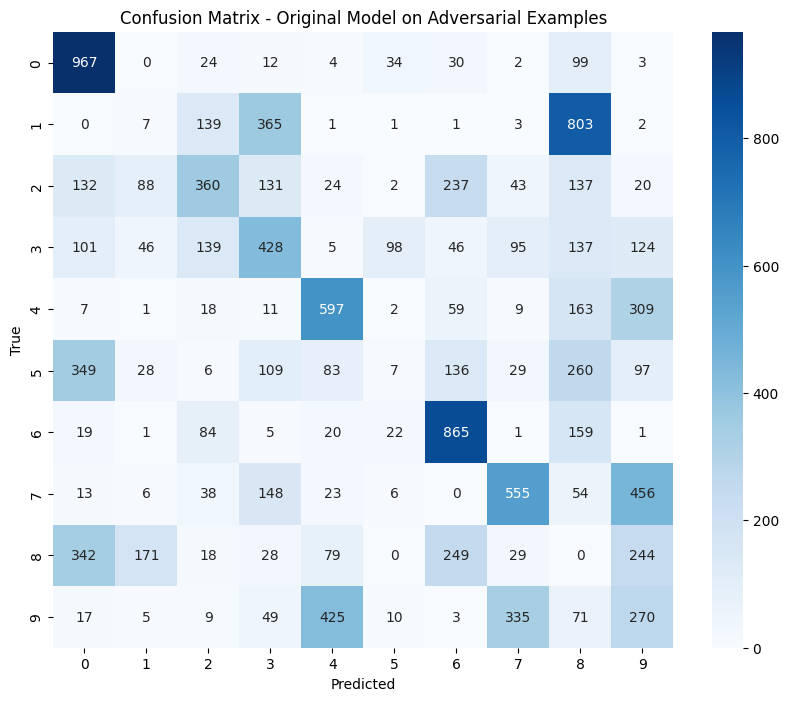

375/375 [==============================] - 1s 1ms/step
Unlearned Adversarial Validation Accuracy: 0.3967
Unlearned Adversarial Validation Precision: 0.3719
Unlearned Adversarial Validation Recall: 0.3976
Unlearned Adversarial Validation F1 Score: 0.3647


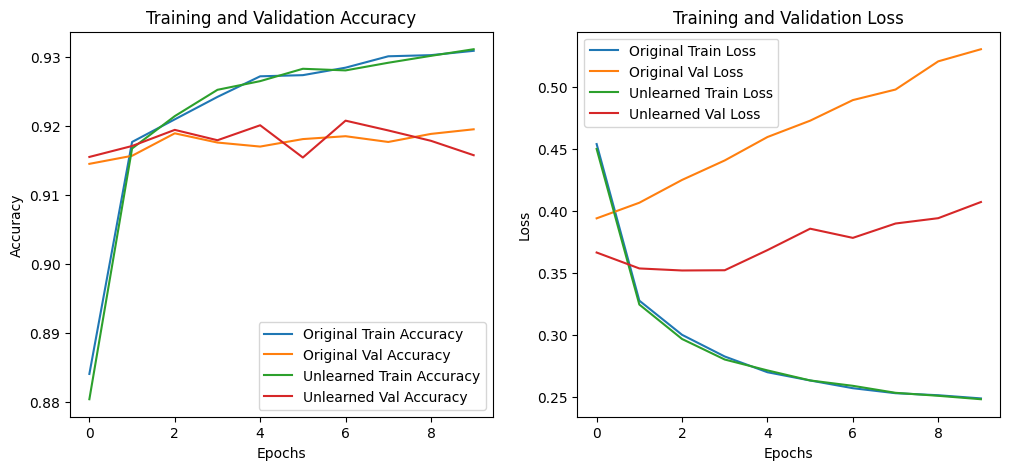

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil
import resource

# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and flatten the images
X_train_full = X_train_full.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0

# Split the full training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define and train the logistic regression model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28*28,)),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Measure training time for the original model
start_time = time.time()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
original_training_time = time.time() - start_time

# Evaluate the model on validation set
y_val_pred = np.argmax(model.predict(X_val), axis=1)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='macro')
recall = recall_score(y_val, y_val_pred, average='macro')
f1 = f1_score(y_val, y_val_pred, average='macro')

print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Validation Precision: {precision:.4f}')
print(f'Validation Recall: {recall:.4f}')
print(f'Validation F1 Score: {f1:.4f}')

# Confusion matrix for the original model
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - Original Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Identify misclassified points
y_train_pred = np.argmax(model.predict(X_train), axis=1)
misclassified_indices = np.where(y_train_pred != y_train)[0]

# Influence Functions approximation to identify influential points
def calculate_influence(model, X, y):
    with tf.GradientTape() as tape:
        logits = model(X)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y, logits)
    gradients = tape.gradient(loss, model.trainable_variables)
    return gradients

influences = []
for i in misclassified_indices:
    X_single = X_train[i].reshape(1, -1)
    y_single = np.array([y_train[i]])
    influence = calculate_influence(model, X_single, y_single)
    influences.append(np.sum([tf.reduce_sum(tf.abs(g)).numpy() for g in influence]))

# Select top 1000 influential points
top_influential_indices = np.argsort(influences)[-1000:]

# Resource Consumption Metrics
def get_memory_usage():
    return resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1024  # Convert to MB

def get_cpu_utilization():
    return psutil.cpu_percent(interval=1)

def get_memory_utilization():
    return psutil.virtual_memory().percent

# Placeholder for energy consumption (requires specialized tools for accurate measurement)
def measure_energy_consumption():
    return "Energy consumption measurement placeholder"

# Placeholder for data exposure risk
def measure_data_exposure_risk():
    return "Data exposure risk measurement placeholder"

# Function to unlearn by influence
def unlearn_by_influence(model, X, y, indices_to_remove):
    start_time = time.time()
    start_memory = get_memory_usage()
    start_cpu = get_cpu_utilization()

    X_unlearned = np.delete(X, indices_to_remove, axis=0)
    y_unlearned = np.delete(y, indices_to_remove, axis=0)
    model_unlearned_influence = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(28*28,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model_unlearned_influence.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history_unlearned = model_unlearned_influence.fit(X_unlearned, y_unlearned, epochs=10, validation_data=(X_val, y_val))

    end_time = time.time()
    end_memory = get_memory_usage()
    end_cpu = get_cpu_utilization()

    unlearned_training_time = end_time - start_time
    memory_overhead = end_memory - start_memory
    cpu_overhead = end_cpu - start_cpu

    return model_unlearned_influence, history_unlearned, unlearned_training_time, memory_overhead, cpu_overhead

# Perform unlearning and measure resource consumption
model_unlearned_influence, history_unlearned, unlearned_training_time, memory_overhead, cpu_overhead = unlearn_by_influence(model, X_train, y_train, top_influential_indices)

# Evaluate the unlearned model on the validation set
y_val_pred_unlearned = np.argmax(model_unlearned_influence.predict(X_val), axis=1)
accuracy_unlearned = accuracy_score(y_val, y_val_pred_unlearned)
precision_unlearned = precision_score(y_val, y_val_pred_unlearned, average='macro')
recall_unlearned = recall_score(y_val, y_val_pred_unlearned, average='macro')
f1_unlearned = f1_score(y_val, y_val_pred_unlearned, average='macro')

print(f'Unlearned Validation Accuracy: {accuracy_unlearned:.4f}')
print(f'Unlearned Validation Precision: {precision_unlearned:.4f}')
print(f'Unlearned Validation Recall: {recall_unlearned:.4f}')
print(f'Unlearned Validation F1 Score: {f1_unlearned:.4f}')

# Confusion matrix for the unlearned model
cm_unlearned = confusion_matrix(y_val, y_val_pred_unlearned)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_unlearned, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - Unlearned Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Measure computational overhead
computational_overhead = unlearned_training_time - original_training_time

# Privacy Preservation Metrics (placeholders)
data_exposure_risk = measure_data_exposure_risk()
residual_influence = "Residual influence measurement placeholder"
compliance_with_privacy_regulations = "Compliance with privacy regulations placeholder"

print(f'Time to Unlearn: {unlearned_training_time:.4f} seconds')
print(f'Computational Overhead: {computational_overhead:.4f} seconds')
print(f'Memory Overhead: {memory_overhead:.4f} MB')
print(f'CPU Overhead: {cpu_overhead:.4f} %')
print(f'Energy Consumption: {measure_energy_consumption()}')
print(f'Data Exposure Risk: {data_exposure_risk}')
print(f'Residual Influence: {residual_influence}')
print(f'Compliance with Privacy Regulations: {compliance_with_privacy_regulations}')

# Adversarial example generation
def create_adversarial_pattern(model, X, y):
    X = tf.convert_to_tensor(X)
    y = tf.convert_to_tensor(y)

    with tf.GradientTape() as tape:
        tape.watch(X)
        prediction = model(X)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y, prediction)

    gradient = tape.gradient(loss, X)
    signed_grad = tf.sign(gradient)
    return signed_grad

epsilon = 0.1
X_val_adv = X_val + epsilon * create_adversarial_pattern(model, X_val, y_val).numpy()
X_val_adv = np.clip(X_val_adv, 0, 1)

# Evaluate the model on adversarial examples
y_val_pred_adv = np.argmax(model.predict(X_val_adv), axis=1)
accuracy_adv = accuracy_score(y_val, y_val_pred_adv)
precision_adv = precision_score(y_val, y_val_pred_adv, average='macro')
recall_adv = recall_score(y_val, y_val_pred_adv, average='macro')
f1_adv = f1_score(y_val, y_val_pred_adv, average='macro')

print(f'Adversarial Validation Accuracy: {accuracy_adv:.4f}')
print(f'Adversarial Validation Precision: {precision_adv:.4f}')
print(f'Adversarial Validation Recall: {recall_adv:.4f}')
print(f'Adversarial Validation F1 Score: {f1_adv:.4f}')

# Confusion matrix for the adversarial examples on the original model
cm_adv = confusion_matrix(y_val, y_val_pred_adv)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_adv, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - Original Model on Adversarial Examples')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluate the unlearned model on adversarial examples
y_val_pred_unlearned_adv = np.argmax(model_unlearned_influence.predict(X_val_adv), axis=1)
accuracy_unlearned_adv = accuracy_score(y_val, y_val_pred_unlearned_adv)
precision_unlearned_adv = precision_score(y_val, y_val_pred_unlearned_adv, average='macro')
recall_unlearned_adv = recall_score(y_val, y_val_pred_unlearned_adv, average='macro')
f1_unlearned_adv = f1_score(y_val, y_val_pred_unlearned_adv, average='macro')

print(f'Unlearned Adversarial Validation Accuracy: {accuracy_unlearned_adv:.4f}')
print(f'Unlearned Adversarial Validation Precision: {precision_unlearned_adv:.4f}')
print(f'Unlearned Adversarial Validation Recall: {recall_unlearned_adv:.4f}')
print(f'Unlearned Adversarial Validation F1 Score: {f1_unlearned_adv:.4f}')

# Visualization
def plot_metrics(history, history_unlearned):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Original Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Original Val Accuracy')
    plt.plot(history_unlearned.history['accuracy'], label='Unlearned Train Accuracy')
    plt.plot(history_unlearned.history['val_accuracy'], label='Unlearned Val Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Original Train Loss')
    plt.plot(history.history['val_loss'], label='Original Val Loss')
    plt.plot(history_unlearned.history['loss'], label='Unlearned Train Loss')
    plt.plot(history_unlearned.history['val_loss'], label='Unlearned Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_metrics(history, history_unlearned)


## sisa approach

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and flatten the images
X_train_full = X_train_full.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0

# Split the full training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define model architecture
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(28*28,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the original model
model = create_model()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the original model on validation set
y_val_pred = np.argmax(model.predict(X_val), axis=1)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='macro')
recall = recall_score(y_val, y_val_pred, average='macro')
f1 = f1_score(y_val, y_val_pred, average='macro')
print(f'Original Model Evaluation:')
print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Validation Precision: {precision:.4f}')
print(f'Validation Recall: {recall:.4f}')
print(f'Validation F1 Score: {f1:.4f}')

# # Plot confusion matrix for the original model
# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix_original, annot=True, cmap='Blues', fmt='g', cbar=False)
# plt.title('Confusion Matrix for Original Model')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()



375/375 [==============================] - 1s 2ms/step
Aggregated Model Evaluation:
Aggregated Validation Accuracy: 0.9773


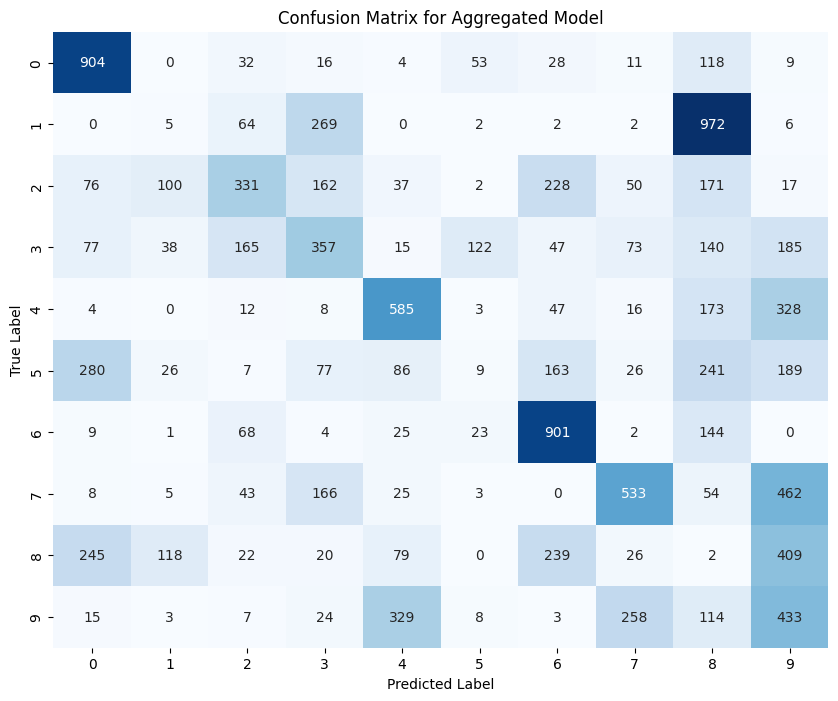

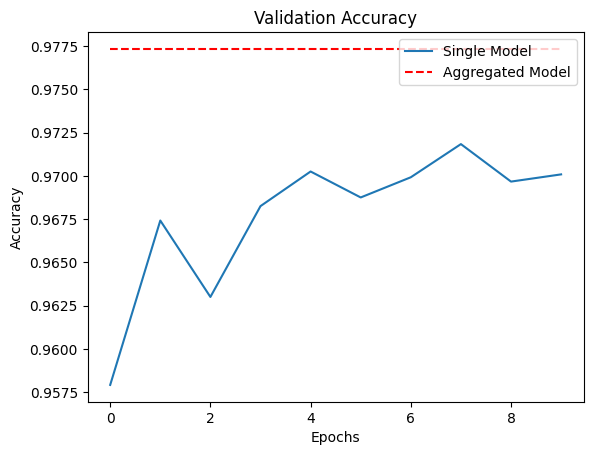

In [ ]:

# SISA approach: Train multiple models on different data shards and aggregate results
num_shards = 5
models = []
for i in range(num_shards):
    X_shard, _, y_shard, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=i*10)
    model_shard = create_model()
    model_shard.fit(X_shard, y_shard, epochs=10, verbose=0)
    models.append(model_shard)

# Aggregate predictions from all models
y_val_pred_aggregated = np.argmax(np.mean([model.predict(X_val) for model in models], axis=0), axis=1)
accuracy_aggregated = accuracy_score(y_val, y_val_pred_aggregated)
print(f'Aggregated Model Evaluation:')
print(f'Aggregated Validation Accuracy: {accuracy_aggregated:.4f}')

conf_matrix = confusion_matrix(y_val, y_val_pred_aggregated)
conf_matrix_unlearned = confusion_matrix(y_val, y_val_pred_unlearned)
conf_matrix_aggregated = confusion_matrix(y_val, y_val_pred_adv)

# Plot confusion matrix for the aggregated model
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_aggregated, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix for Aggregated Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot accuracy for aggregated model
plt.plot(history.history['val_accuracy'], label='Single Model')
plt.hlines(accuracy_aggregated, xmin=0, xmax=len(history.history['val_accuracy']) - 1, color='r', linestyle='--', label='Aggregated Model')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()